In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trainset = pd.read_csv("Train_Data.csv" )
testset =  pd.read_csv("Test_Data.csv" )

In [4]:
trainset.head(5)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [5]:
testset.head(5)

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [6]:
trainset = trainset.drop(["campaign"] , axis=1)

In [7]:
testset = testset.drop(["campaign"] , axis=1)

In [8]:

def ad_clean_first(data):
  for i, row in data.iterrows():
    if data.at[i, 'adgroup']=="adgroup 1":
      data.at[i, 'adgroup'] = '1'
    if data.at[i, 'adgroup']=="adgroup 2":
      data.at[i, 'adgroup'] = '2'
    if data.at[i, 'adgroup']=="adgroup 3":
      data.at[i, 'adgroup'] = '3'
    if data.at[i, 'adgroup']=="adgroup 4":
      data.at[i, 'adgroup'] = '4'

  data['ad']=data.ad.str.extract('(\d+)')


In [9]:
ad_clean_first(trainset)

In [10]:
ad_clean_first(testset)

In [11]:
trainset.head(3)

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,1,1,24,6,0.08,0,0.0
1,01-08-2020,2,1,1,0,0.00,0,0.0
2,01-08-2020,3,1,13,4,0.04,0,0.0


In [12]:
testset.head(3)

,date,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,1,1,0.58,121,49,1
1,01-03-2021,3,1,0.17,22,12,0
2,01-03-2021,4,1,0.05,5,3,0


In [13]:
def ad_clean_second(data):
  #converting it into the datetime object
  data["date"]= pd.to_datetime(data["date"])
  # info of data
  data.info()
  # display
  data

  data["Year"] = data["date"].apply(lambda x:x.year)
  data["Month"] = data["date"].apply(lambda x:x.month)
  data["Day"] = data["date"].apply(lambda x:x.day)
  

In [14]:
ad_clean_second(trainset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4571 non-null   datetime64[ns]
 1   adgroup      4571 non-null   object        
 2   ad           4571 non-null   object        
 3   impressions  4571 non-null   int64         
 4   clicks       4571 non-null   int64         
 5   cost         4571 non-null   float64       
 6   conversions  4571 non-null   int64         
 7   revenue      4571 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 285.8+ KB


In [15]:
trainset = trainset.drop(["date"] , axis=1)
trainset.head(3)

,adgroup,ad,impressions,clicks,cost,conversions,revenue,Year,Month,Day
0,1,1,24,6,0.08,0,0.0,2020,1,8
1,2,1,1,0,0.00,0,0.0,2020,1,8
2,3,1,13,4,0.04,0,0.0,2020,1,8


In [16]:
ad_clean_second(testset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         318 non-null    datetime64[ns]
 1   adgroup      318 non-null    object        
 2   ad           318 non-null    object        
 3   cost         318 non-null    float64       
 4   impressions  318 non-null    int64         
 5   clicks       318 non-null    int64         
 6   conversions  318 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 17.5+ KB


In [17]:
testset.head(3)

,date,adgroup,ad,cost,impressions,clicks,conversions,Year,Month,Day
0,2021-01-03,1,1,0.58,121,49,1,2021,1,3
1,2021-01-03,3,1,0.17,22,12,0,2021,1,3
2,2021-01-03,4,1,0.05,5,3,0,2021,1,3


In [18]:
testset = testset.drop(["date"] , axis=1)
testset.head(3)

,adgroup,ad,cost,impressions,clicks,conversions,Year,Month,Day
0,1,1,0.58,121,49,1,2021,1,3
1,3,1,0.17,22,12,0,2021,1,3
2,4,1,0.05,5,3,0,2021,1,3


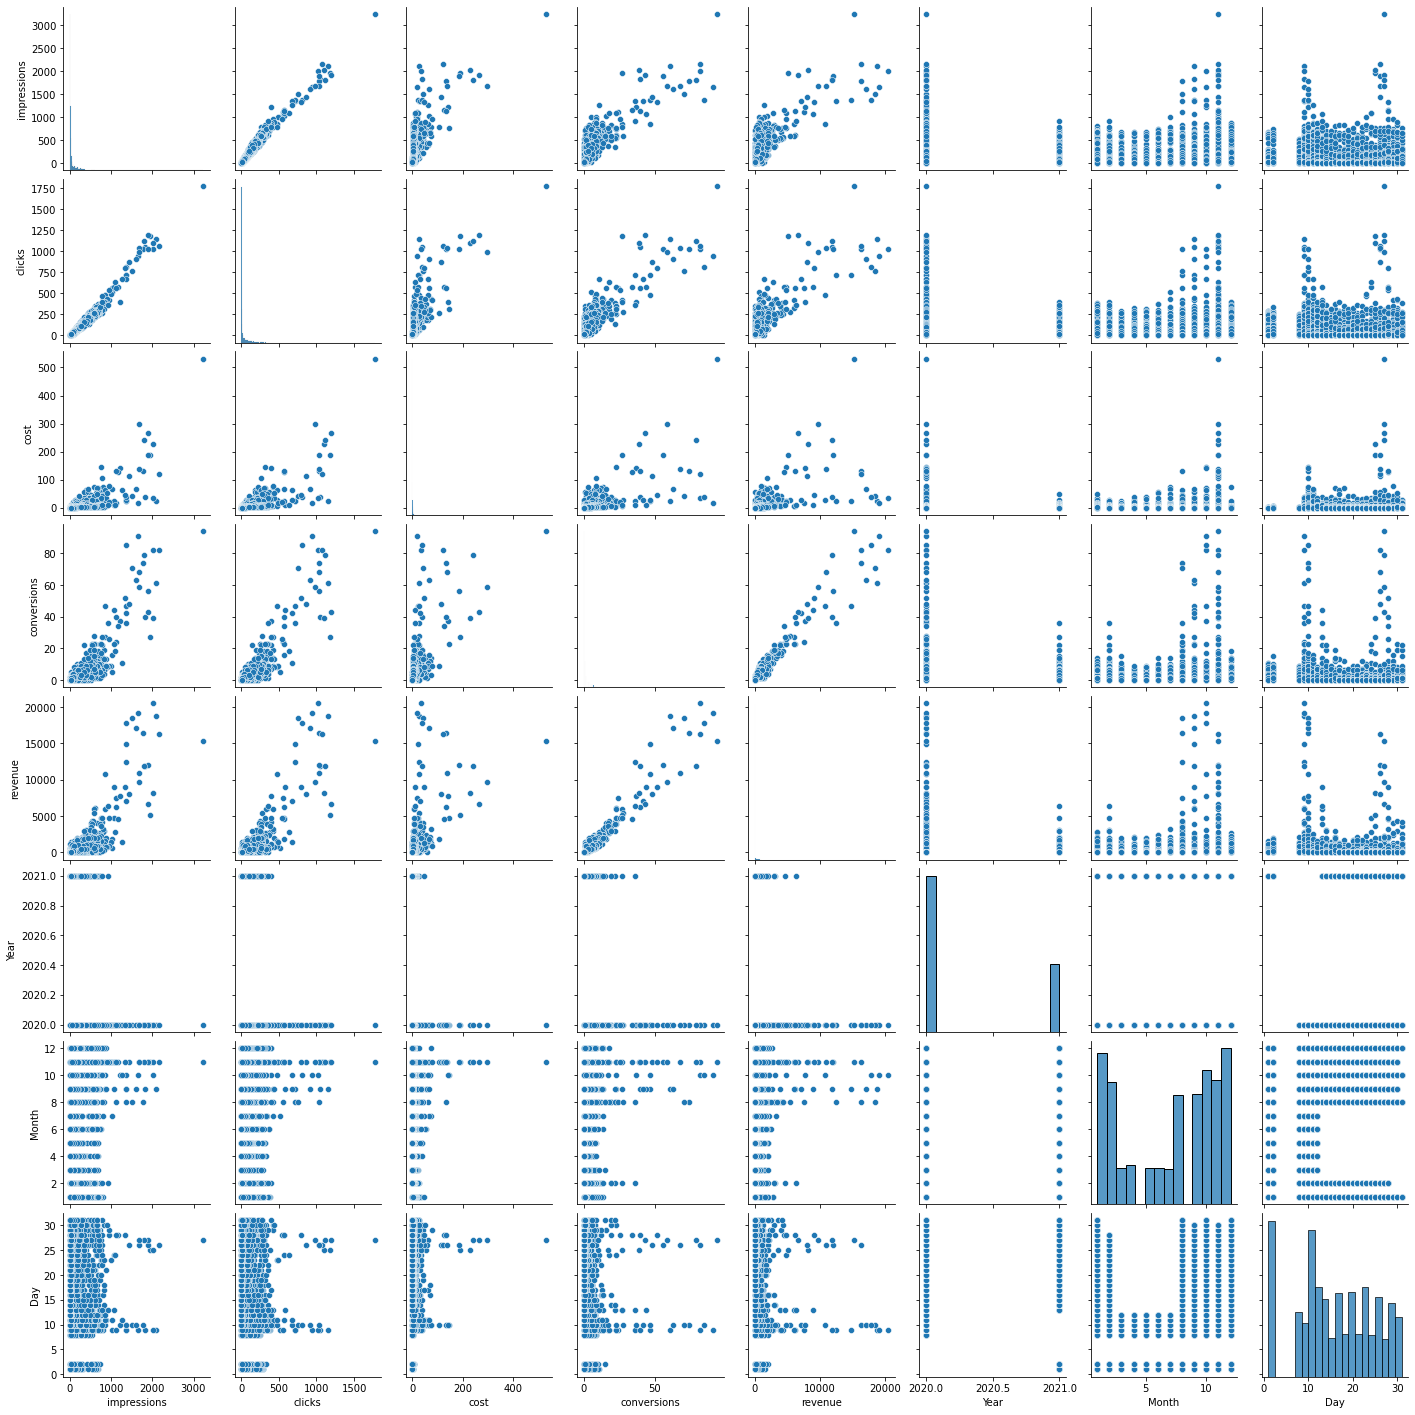

In [19]:
sns.pairplot(trainset)

In [20]:
#changing the datatype of adgroup and ad
def change_dtypess(data):
  data[['adgroup', 'ad']] = data[['adgroup', 'ad']].apply(pd.to_numeric)
  print(data.dtypes)

In [21]:
change_dtypess(trainset)

adgroup          int64
ad               int64
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
Year             int64
Month            int64
Day              int64
dtype: object


In [22]:
change_dtypess(testset)

adgroup          int64
ad               int64
cost           float64
impressions      int64
clicks           int64
conversions      int64
Year             int64
Month            int64
Day              int64
dtype: object


In [23]:
trainset.columns.tolist()

['adgroup',
 'ad',
 'impressions',
 'clicks',
 'cost',
 'conversions',
 'revenue',
 'Year',
 'Month',
 'Day']

In [24]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   adgroup      318 non-null    int64  
 1   ad           318 non-null    int64  
 2   cost         318 non-null    float64
 3   impressions  318 non-null    int64  
 4   clicks       318 non-null    int64  
 5   conversions  318 non-null    int64  
 6   Year         318 non-null    int64  
 7   Month        318 non-null    int64  
 8   Day          318 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 22.5 KB


In [25]:
X_train = trainset
X_train = X_train.drop(columns=['revenue'])
y_train = trainset['revenue']
X_test = testset

X_train.columns.tolist()


['adgroup',
 'ad',
 'impressions',
 'clicks',
 'cost',
 'conversions',
 'Year',
 'Month',
 'Day']

In [26]:
X_test.head(3)

,adgroup,ad,cost,impressions,clicks,conversions,Year,Month,Day
0,1,1,0.58,121,49,1,2021,1,3
1,3,1,0.17,22,12,0,2021,1,3
2,4,1,0.05,5,3,0,2021,1,3


In [27]:
X_test = X_test[['adgroup','ad','impressions','clicks','cost','conversions','Year','Month',"Day"]]
X_test.head(3)

,adgroup,ad,impressions,clicks,cost,conversions,Year,Month,Day
0,1,1,121,49,0.58,1,2021,1,3
1,3,1,22,12,0.17,0,2021,1,3
2,4,1,5,3,0.05,0,2021,1,3


In [28]:
X_train.shape, y_train.shape, X_test.shape

((4571, 9), (4571,), (318, 9))

In [29]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators=100,learning_rate= 0.1,max_depth=3,subsample= 0.5,seed=1)
xgb.fit(X_train, y_train)

predict = xgb.predict(X_test)

revenue = pd.DataFrame(predict)
revenue.columns=["revenue"]
revenue.to_csv('Submissionfinal.csv', index = False)